In [1]:
# Load all helper function
%run -i '../util/helper.py'

## Load Data and Data Split

In [2]:
df  = pd.read_csv('../Dataset/brazilian_ecommerce_encoded_scaled.csv')
y = df["is_delayed"]
X = df.drop(["is_delayed"], axis=1, inplace=False)

In [3]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2, stratify=y)

In [4]:
print(X_dev.shape)
print(X_test.shape)

(92506, 29)
(23127, 29)


## Hyperparameter Tuning

### Stratified Sampling

#### GridSearch

In [5]:
strategy = ["most_frequent", "prior", "stratified", "uniform"]
start3 = time()

parameter_grid = {"classifier__strategy": strategy}

pipe_dummy_tune = Pipeline([('classifier',DummyClassifier(random_state=random_state))])

pipe_dummy = make_pipeline(GridSearchCV(pipe_dummy_tune,
                                      param_grid=parameter_grid,
                                      return_train_score=True,
                                      cv=StratifiedKFold(n_splits=10,shuffle=False),
                                      n_jobs=-1, 
                                      scoring=['recall','f1'],
                                      refit='f1'))
pipe_dummy.fit(X_dev, np.ravel(y_dev))
end3 = time()
print("Dummy model takes " + str(end3-start3) + "seconds")
print("The performance of the Dummy model on test data is ", pipe_dummy.score(X_test, y_test))
grid_search_dummy= pipe_dummy.named_steps["gridsearchcv"]
print(f"The Dummy model Best hyperparameters is ", grid_search_dummy.best_params_)

Dummy model takes 8.056877851486206seconds
The performance of the Dummy model on test data is  0.1279175507729615
The Dummy model Best hyperparameters is  {'classifier__strategy': 'uniform'}


### Evaluate on the Test Set

In [6]:
dummy_prediction = pipe_dummy.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,dummy_prediction)}')
print(f'Recall: {recall_score(y_test,dummy_prediction)}')
print(f'Precision: {precision_score(y_test,dummy_prediction)}')
print(f'F-1 Score: {f1_score(y_test,dummy_prediction)}')

recall, precision = recall_score(y_test,dummy_prediction), precision_score(y_test,dummy_prediction)

Accuracy: 0.5023997924503827
Recall: 0.48422260470453243
Precision: 0.07369248231904305
F-1 Score: 0.1279175507729615


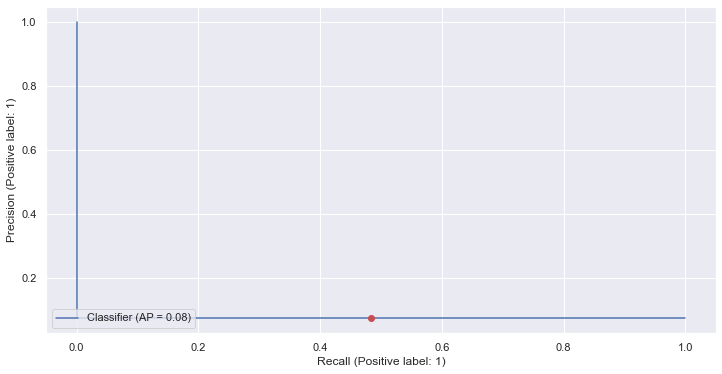

In [7]:
probs = pipe_dummy.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall,precision,'ro');

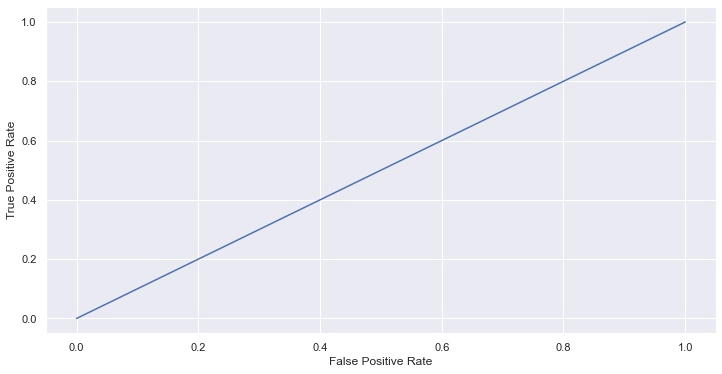

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fpr, tpr = tpr)
disp.plot()

#### Feature Importances

Text(0.5, 1.0, 'Feature Importance')

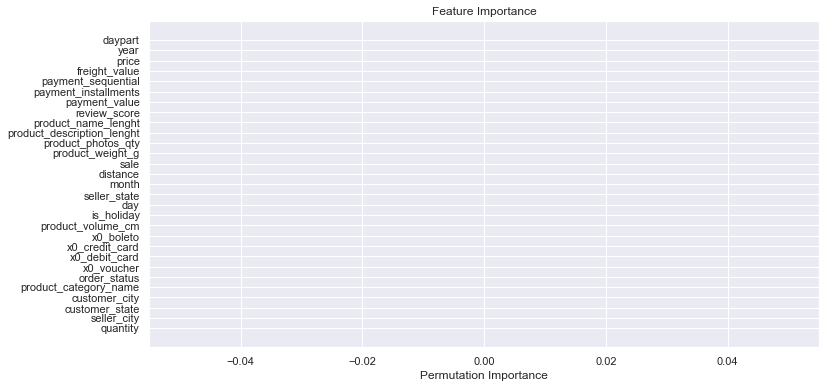

In [9]:
perm_importance = permutation_importance(pipe_dummy, X_test, y_test)

feature_names = X.columns
feat_imp = perm_importance.importances_mean
sorted_idx = feat_imp.argsort()
plt.barh(feature_names[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

In [10]:
filename = '../model/Dummy_stratified.sav'
pickle.dump(pipe_dummy, open(filename, 'wb'))

### Downsampling

In [11]:
rus = RandomUnderSampler(replacement=False, random_state=random_state)
X_dev_us, y_dev_us = rus.fit_resample(X_dev, y_dev)

#### GridSearch

In [12]:
strategy = ["most_frequent", "prior", "stratified", "uniform"]
start3 = time()

parameter_grid = {"classifier__strategy": strategy}

pipe_dummy_tune = Pipeline([('classifier',DummyClassifier(random_state=random_state))])

pipe_dummy = make_pipeline(GridSearchCV(pipe_dummy_tune,
                                      param_grid=parameter_grid,
                                      return_train_score=True,
                                      cv=StratifiedKFold(n_splits=10,shuffle=False),
                                      n_jobs=-1, 
                                      scoring=['recall','f1'],
                                      refit='f1'))
pipe_dummy.fit(X_dev_us, np.ravel(y_dev_us))
end3 = time()
print("Dummy model takes " + str(end3-start3) + "seconds")
print("The performance of the Dummy model on test data is ", pipe_dummy.score(X_test, y_test))
grid_search_dummy= pipe_dummy.named_steps["gridsearchcv"]
print(f"The Dummy model Best hyperparameters is ", grid_search_dummy.best_params_)

Dummy model takes 0.43695521354675293seconds
The performance of the Dummy model on test data is  0.1297965874375978
The Dummy model Best hyperparameters is  {'classifier__strategy': 'stratified'}


### Evaluate on the Test Set

In [13]:
dummy_prediction = pipe_dummy.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,dummy_prediction)}')
print(f'Recall: {recall_score(y_test,dummy_prediction)}')
print(f'Precision: {precision_score(y_test,dummy_prediction)}')
print(f'F-1 Score: {f1_score(y_test,dummy_prediction)}')

recall, precision = recall_score(y_test,dummy_prediction), precision_score(y_test,dummy_prediction)

Accuracy: 0.4950058373329874
Recall: 0.49971313826735514
Precision: 0.07458468915910259
F-1 Score: 0.1297965874375978


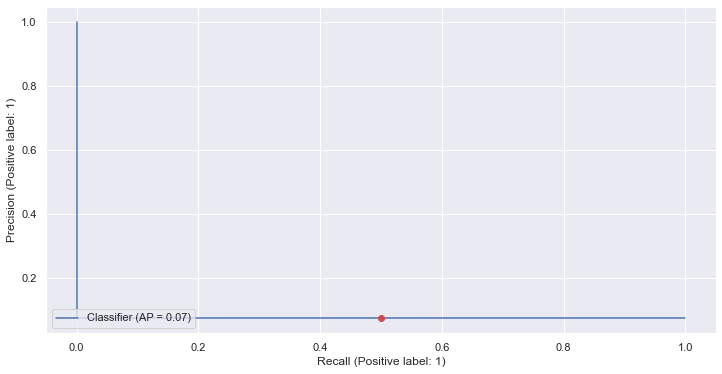

In [14]:
probs = pipe_dummy.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall,precision,'ro')

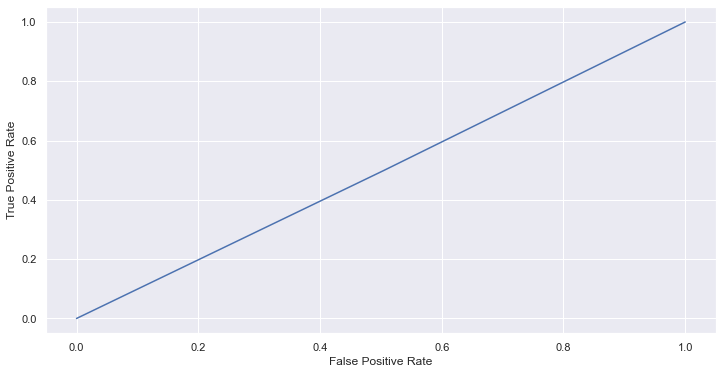

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fpr, tpr = tpr)
disp.plot()

#### Feature Importances

Text(0.5, 1.0, 'Feature Importance')

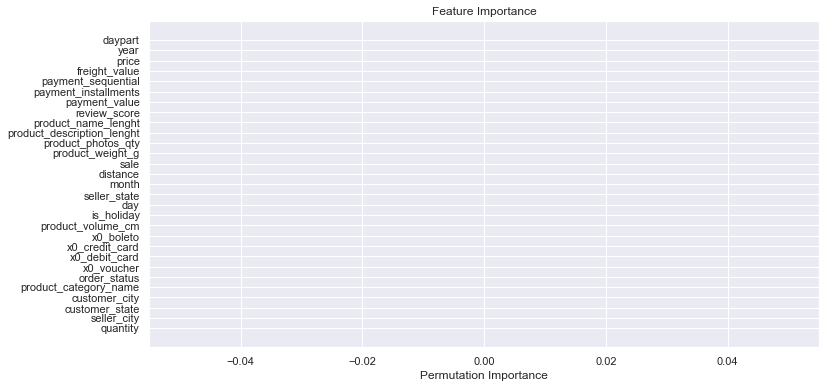

In [16]:
perm_importance = permutation_importance(pipe_dummy, X_test, y_test)

feature_names = X.columns
feat_imp = perm_importance.importances_mean
sorted_idx = feat_imp.argsort()
plt.barh(feature_names[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

In [17]:
filename = '../model/Dummy_downsampling.sav'
pickle.dump(pipe_dummy, open(filename, 'wb'))